This is Fatemeh Shariat's Project!

# Set up 

In [1]:
# #For making Pandas Profiling work.

# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [2]:
# #Just to get the data's details once. Then no need to run again cause we saved the report file!

# from pandas_profiling import ProfileReport
# Profile = ProfileReport(df)
# # Profile.to_notebook_iframe()
# # Profile.to_file(output_file="PokemonStat.html")

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'/content/drive/MyDrive/YazdinejadHWs/Project/pokemon.csv')
df.columns = ['#', 'Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense',
       'SpAtk', 'SpDef', 'Speed', 'Generation', 'Legendary']

# One: Introduction

First we try to underestand our data's structure and then will make necessary changes.


In [5]:
#Getting to know data

df.head()

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
df.describe()

,#,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
df.loc[780:783:]

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
780,710,PumpkabooAverage Size,Ghost,Grass,335,49,66,70,44,55,51,6,False
781,710,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,56,6,False
782,710,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False
783,710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False


We can see in our data, "#" is a way to know each unique Pokemon, since we have different sizes of one Pokemon. 

In [8]:
#Checking nulls

df.isnull().sum()

#               0
Name            0
Type1           0
Type2         386
Total           0
HP              0
Attack          0
Defense         0
SpAtk           0
SpDef           0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [9]:
#For later uses
df_copy = df.copy()

In [10]:
#Filling nulls with "None"

df['Type2'].fillna(value='None', inplace=True)
# df['Type2'][df['Type2'].isnull() == True] = 'None'

In [11]:
df.dtypes

#              int64
Name          object
Type1         object
Type2         object
Total          int64
HP             int64
Attack         int64
Defense        int64
SpAtk          int64
SpDef          int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [12]:
df.shape

(800, 13)

In [13]:
df.nunique()

#             721
Name          800
Type1          18
Type2          19
Total         200
HP             94
Attack        111
Defense       103
SpAtk         105
SpDef          92
Speed         108
Generation      6
Legendary       2
dtype: int64

# Two: Visualization

## 2.1 Pandas Profiling 

### 2.1.1 Profiling Report 

In [ ]:
# ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

### 2.1.2 Profiling Report Analysis

**Overview**

1. **Overview**

  We have missing values. ( We dealt with them in previous section)

  There is no duplicated rows.


2. **Warnings**
  
  "Name" has a high cardinality, because of 800 distinct values, which is normal.	

  Most columns are highly correlated with "Total", which is normal becase total is sum of base features for 
  Pokemons. Other information, we already analyzed before.



---

**Variables**

1. **Type 1**

  Toggle details > Categories > Common Values:

  We can see Water is the most frequent primary type for Pokemons with 14% frequency, after that, Normal comes second with 12%, we have Grass and Bug in third and fourth position.


2. **Type 2**

   Toggle details > Categories > Common Values:

   If we let aside half of Pokemons without secondary type, most common secondary type is Flying with 12% frequency. Then Ground, Poison, Psychic, comes respectively, each with 4% frequency.


3. **Rest of Variables**
  
  For the rest of variables, we would like to check their Histogram plots, which is located in, Toggle details > Histogram. Since we also want to see their distribution, add comments while having the plots in sight, we have to draw the histograms again, therefore we continue this part in setion 2.2. 


4. **Legendary**

     Toggle details > Chart:

     We can see in this chart, that 91.9% of this variable have the value "False", meaning the Pokemon isn't Legendary. Only 8.1% of Pokemons aere Legendary, shows our data is imbalanced!



---

**Interactions**

In this section we can see scatter plots for every possible combination of two variables. After checking all of them, here are some points we understood:

1. Legendary pokemons have stronger attributes.
2. Attack and Defense are lineary related.
3. Attack seems to have linear relation with Special Attack.
4. Defense seems to have linear relation with Special Defense.
5. Special Attack seems to have a strong linear relation with Total.
6. Speed seems to only have a relation with Special Attack.
7. Looking at HP's plots, two dots seem to be an outlier with HP value of 250, meanwhile having value close to 0 for Attack and Defense. They can also be noise.
---

**Correlations**

We can see different types of correlation plots, and we don't need all of them, so we'll discus this further in section 2.3

##2.2 Variables Plots

We will draw plots that we found useful in previous section and give more explanations on them.

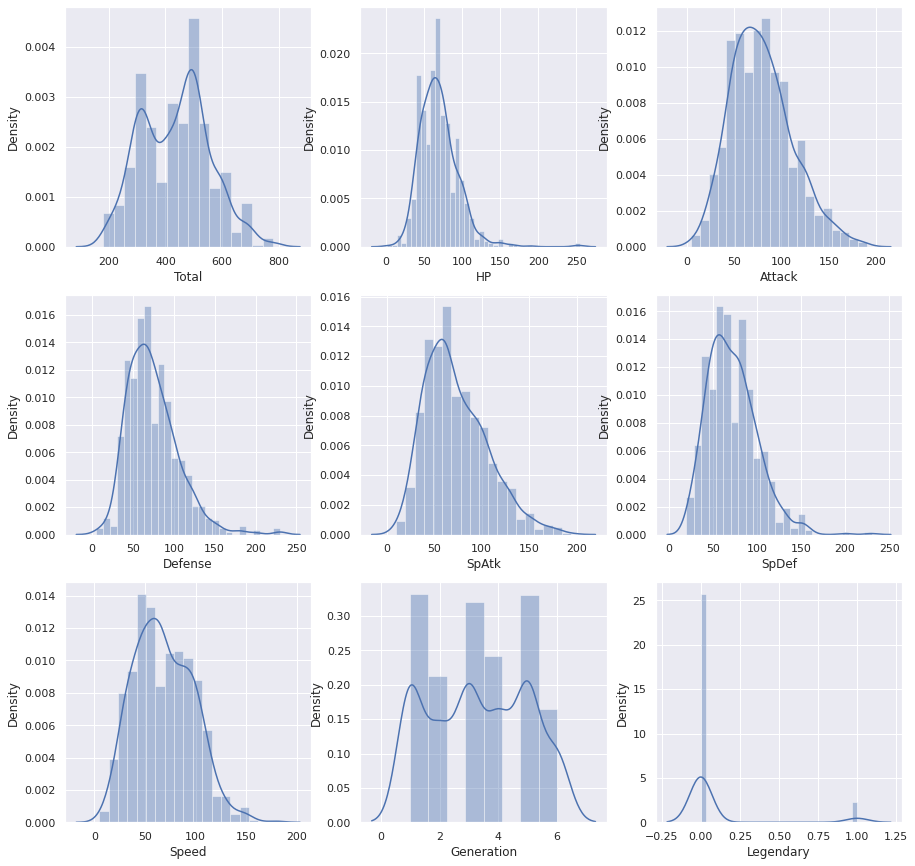

In [21]:
#Plot 2.2.1: Distribution Plot for each Variable

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

sns.distplot(df['Total'], kde=True, norm_hist=False, ax=axs[0, 0])
sns.distplot(df['HP'], kde=True, norm_hist=False, ax=axs[0, 1])
sns.distplot(df['Attack'], kde=True, norm_hist=False, ax=axs[0, 2])

sns.distplot(df['Defense'], kde=True, norm_hist=False, ax=axs[1, 0])
sns.distplot(df['SpAtk'], kde=True, norm_hist=False, ax=axs[1, 1])
sns.distplot(df['SpDef'], kde=True, norm_hist=False, ax=axs[1, 2])

sns.distplot(df['Speed'], kde=True, norm_hist=False, ax=axs[2, 0])
sns.distplot(df['Generation'], kde=True, norm_hist=False, ax=axs[2, 1])
sns.distplot(df['Legendary'], kde=True, norm_hist=False, ax=axs[2, 2])

plt.show()

Plot 2.2.1: Distribution Plot for each Variable:

"Generation" and "Legendary" don't have any noticable distribution, but we will talk more about them later.

"Attack" is close to be noramlly distributed, "Defense" seems to have thinner tails and values are more centered around the mean. 

"HP", "Defense", "SpAtk" and "SpDef" are right skewed. 

## 2.3 Correlation Plot

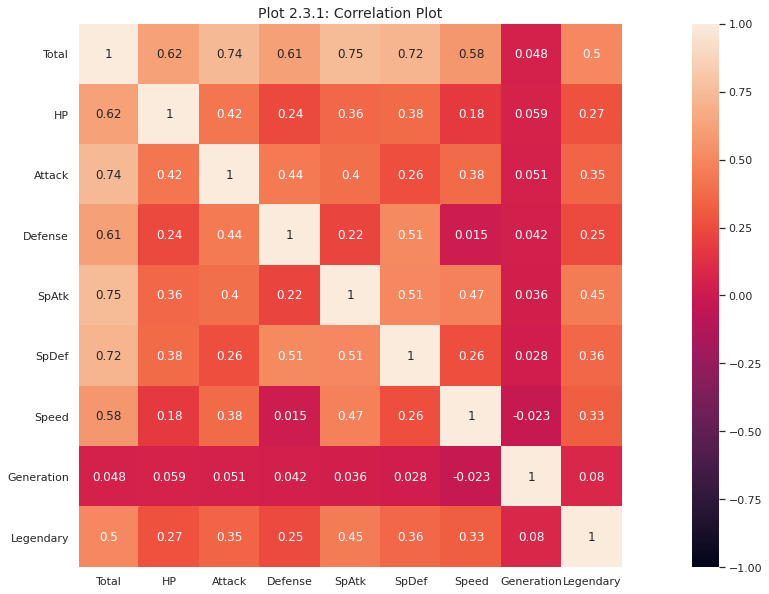

In [19]:
#Plot 2.3.1: Correlation Plot

plt.figure(figsize=(25,10))
sns.heatmap(df.drop("#", axis=1).corr(), vmin= -1, vmax=1, square=True, annot=True)
plt.title('Plot 2.3.1: Correlation Plot',fontsize=14)
plt.show()

Plot 2.3.1:Total has most correlation with Legendary, then Special Attack comes second.
Correlation of Generation with legendary is so low that we can say, it's 0.


## 2.4 General Plots

Now we will visualize our data to describe it better and to feel each feature more.


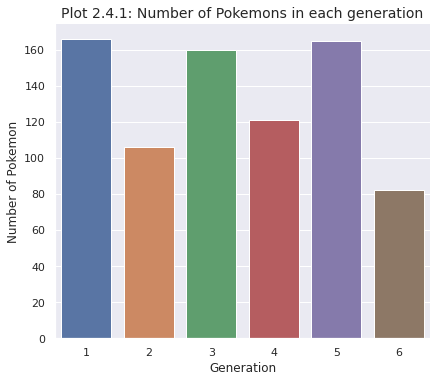

In [23]:
#Plot 2.4.1: Number of Pokemons in each generation

sns.factorplot(x='Generation', data=df, size=5, aspect=1.2, kind='count'
).set_axis_labels('Generation', 'Number of Pokemon')
plt.title("Plot 2.4.1: Number of Pokemons in each generation",fontsize=14)
plt.show()

Plot 2.4.1: There seem to be no noticeable trend except that the odd-numbered generations have more pokemons than even-numbered!

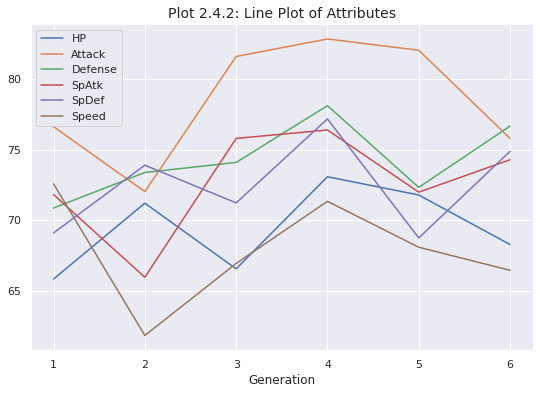

In [24]:
#Plot 2.4.2: Line plot of each attribute in different generations

df.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']
                                ].plot.line(figsize=(9,6)).set_title("Plot 2.4.2: Line Plot of Attributes",fontsize=14)
plt.show()

Plot 2.4.2: Fourth generation Pokemons have highest average in each feature, lowest average is for second generation Pokemons.

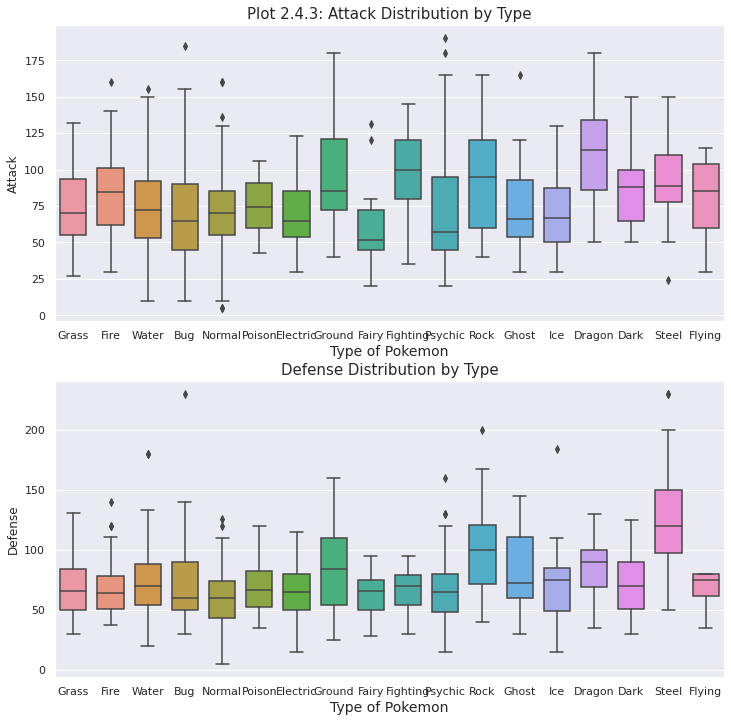

In [25]:
#Plot 2.4.3: Attack & Defense Level of Pokemons based on their primary Type

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

sns.boxplot(ax=axes[0], x="Type1", y="Attack", width=0.7, data=df)
axes[0].set_title("Plot 2.4.3: Attack Distribution by Type", fontsize=15)
axes[0].set_xlabel("Type of Pokemon", fontsize=14)

sns.boxplot(ax=axes[1], x="Type1", y="Defense", width=0.7, data=df)
axes[1].set_title("Defense Distribution by Type", fontsize=15)
axes[1].set_xlabel("Type of Pokemon", fontsize=14)
plt.show()

Plot 2.4.3: Just a cute plot to see each type's Attack and Defense level range. There isn't many useful information in this plot, but we can see some types like Dragon have higher minimum and average attack level than other Pokemons while Steel-typed Pokemons are the best at defending!

## 2.5 Plots for Relationship Between Attributes 

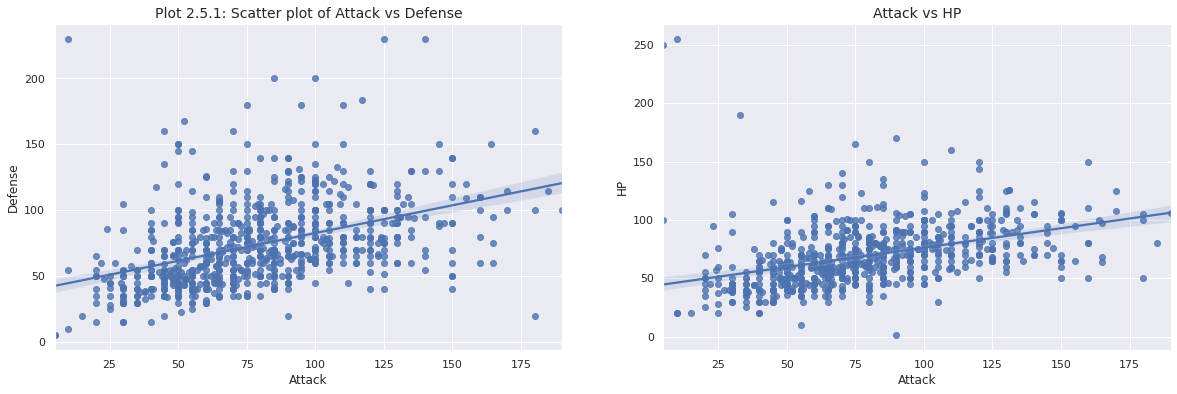

In [26]:
#Plot 2.5.1: Scatter plot to show relation of Attack vs Defense and HP

fig, axes = plt.subplots(1,2, figsize=(20, 6))

sns.regplot(ax=axes[0], x="Attack", y="Defense", data=df, fit_reg=True).set_title(
    "Plot 2.5.1: Scatter plot of Attack vs Defense",fontsize=14)  

sns.regplot(ax=axes[1], x="Attack", y="HP", data=df, fit_reg=True).set_title(
    "Attack vs HP",fontsize=14)
plt.show()

Plot 2.5.1: We fitted a regression line, using "fit_Reg", to check if the relationship is linear. It seems Defense and Attack relation is linear.

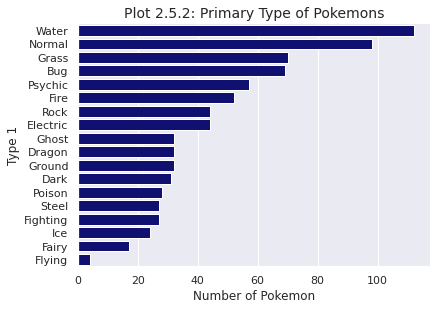

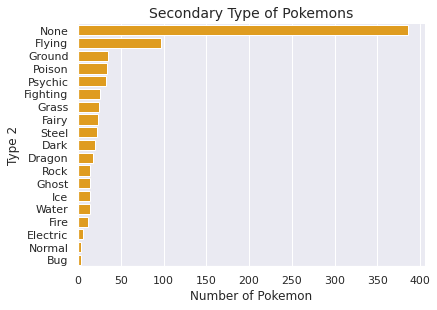

In [27]:
#Plot 2.5.2: Comparing number of Pokemons based on their primary and secondary type

sns.factorplot(y='Type1',data=df,kind='count',order=df['Type1'].value_counts().index,size=4,aspect=1.5,color='navy'
).set_axis_labels('Number of Pokemon', 'Type 1')
plt.title("Plot 2.5.2: Primary Type of Pokemons",fontsize=14)

sns.factorplot(y='Type2',data=df,kind='count',order=df['Type2'].value_counts().index,size=4,aspect=1.5,color='orange'
).set_axis_labels('Number of Pokemon', 'Type 2')
plt.title("Secondary Type of Pokemons",fontsize=14);

Plot 2.5.2: Water, Normal, Grass and Bug are the most common primary types. Almost half of all Pokemon don't have secondary type.
While Flying is the most common secondary type, it is the least common primary type. 

In next line we can see the exact number of Pokemons with secondary type.


In [28]:
#Splitting Pokemons based on the existence of their secondary type

single_type_pokemon = []
dual_type_pokemon = []

count = 0
for i in df_copy.index:
    if(pd.isnull(df_copy.Type2[i]) == True):
    #if(df_copy.type2[i] == np.nan):
        count += 1
        single_type_pokemon.append(df_copy.Name[i])
    else:
        dual_type_pokemon.append(df_copy.Name[i])

print("Number of Pokemons with only primary type:", len(single_type_pokemon))
print("Number of Pokemons with secondary type:", len(dual_type_pokemon))

Number of Pokemons with only primary type: 386
Number of Pokemons with secondary type: 414


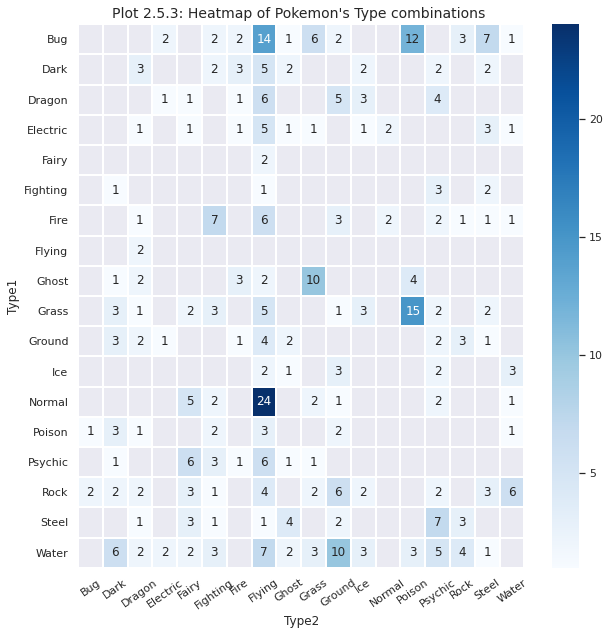

In [29]:
#Plot 2.5.3: Pokemon type combinations

plt.subplots(figsize=(10, 10))

sns.heatmap(
    df[df['Type2']!='None'].groupby(['Type1', 'Type2']
                                    ).size().unstack(),linewidths=1,annot=True,cmap="Blues")
plt.xticks(rotation=35)
plt.title("Plot 2.5.3: Heatmap of Pokemon's Type combinations ",fontsize=14)
plt.show()

Plot 2.5.3: Normal/Flying, Grass/Poison, Bug/Flying and Bug/Poison are the top 4 combinations for dual-type Pokemons.

## 2.6 Plots Related to Target

Now let's take a look at our target, predicting if a Pokemon is Legendary or not.  For this matter we will plot each attribute while focusing on differentiating legendary and non-legendary Pokemons. 

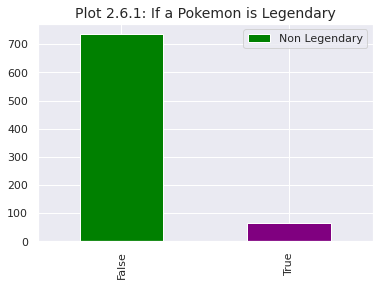

In [30]:
#Plot 2.6.1: Plotting the Target

X = df.drop('Legendary', axis=1)  #Splitting target from data
Y = df['Legendary']

Y.value_counts().plot.bar(color=['green', 'purple'])
plt.title("Plot 2.6.1: If a Pokemon is Legendary",fontsize=14)
plt.legend(labels=['Non Legendary','Legendary'])
plt.show()

Plot 2.6.1: Our data is imbalanced! So we need to think of a way to fix this later in this project.

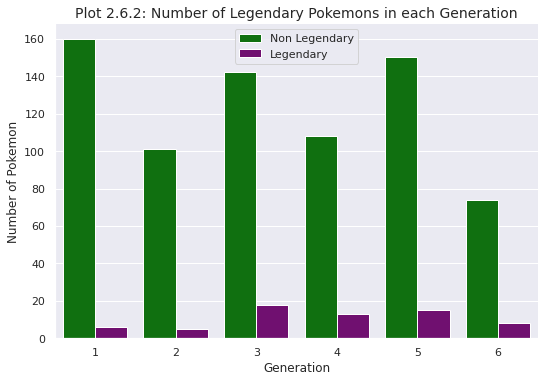

In [31]:
#Plot 2.6.2: Number of Legendary Pokemons in each Generation

g = sns.factorplot(x='Generation', data=df,kind='count', hue='Legendary',palette= ["green", "purple"], size=5, aspect=1.5,legend=False,
    ).set_axis_labels('Generation', 'Number of Pokemon')

g.ax.legend(labels=['Non Legendary','Legendary'])
g.ax.set_title("Plot 2.6.2: Number of Legendary Pokemons in each Generation",fontsize=14)
plt.show()

Plot 2.6.2: Third generation have most legendary Pokemons.

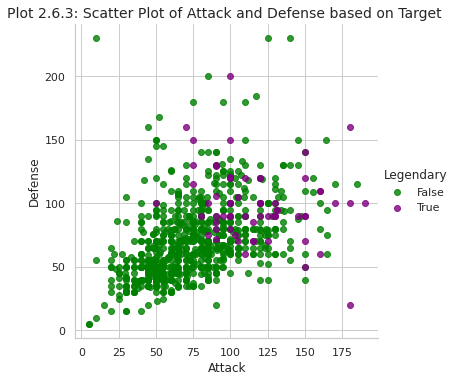

In [32]:
#Plot 2.6.3: Scatter Plot of Attack and Defense based on Target

sns.set_style('whitegrid')
sns.lmplot(x="Attack",y="Defense",data=df,fit_reg=False,hue='Legendary', palette= ["green", "purple"])
plt.title("Plot 2.6.3: Scatter Plot of Attack and Defense based on Target ",fontsize=14)
plt.show()  

Plot 2.6.3: We can see clearly that legendary pokemons have both high defense and attack levels.


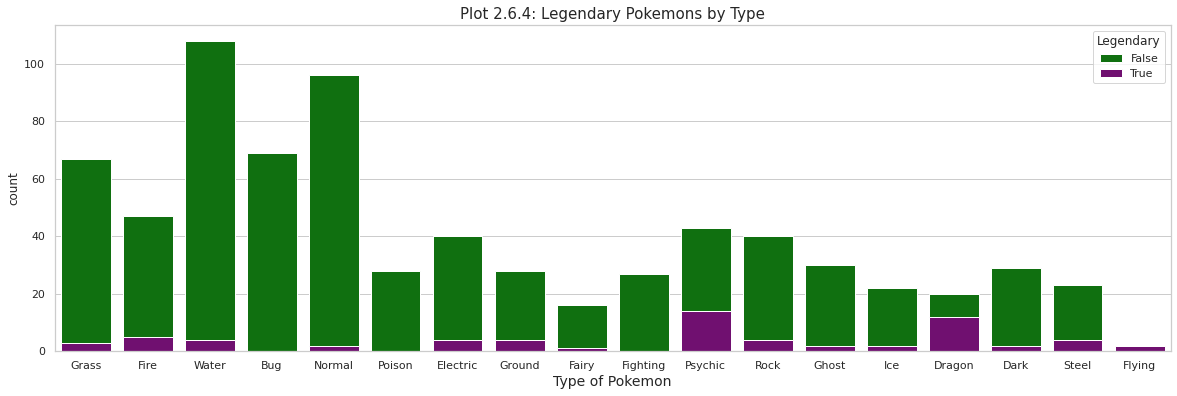

In [33]:
#Plot 2.6.4: Legendary Pokemons by Type

plt.figure(figsize=(20, 6))
sns.countplot(x="Type1", data=df, hue='Legendary',palette= ["green", "purple"],
    dodge=False,).set_xlabel("Type of Pokemon", fontsize=14
                            )
plt.title("Plot 2.6.4: Legendary Pokemons by Type", fontsize=15)
plt.show()

Plot 2.6.4: Psychic and Dragon have most legendary Pokemons, this shows number of legendary Pokemons aren't distributed evenly in each type. So type is an important feature for our target.

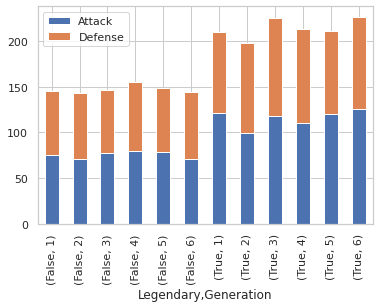

In [34]:
#Plot 2.6.5: Stacked Attack and Defense based on Legendary Pokemons

df2 = df.copy()
df2
pokemon_stats_legendary = df2.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]
pokemon_stats_legendary.plot.bar(stacked=True)

plt.show()

# Three: References


https://www.kaggle.com/gurarako/visualization-using-seaborn-pokemon-part-1

https://www.kaggle.com/shikhar1/complete-seaborn-tutorial-pokemon

https://www.kaggle.com/koreric/classifying-legendary-pokemon






---




If we wanted to continue this project, we'll have to deal with imbalanvced data before modeling. A good article I have found for this matter, is:

https://www.kaggle.com/shrutimechlearn/pokemon-classification-and-smote-for-imbalance 